### Core 6
## Métricas de Agrupamiento (K-means y DBSCAN) (Core)

### Descripción:
En esta actividad, se utilizarán los algoritmos K-means y DBSCAN para agrupar datos del dataset «Credit Card Data» disponible en Kaggle. El objetivo es aplicar ambas técnicas de clustering y compararlas utilizando métricas como el «silhouette score» y el «calinski-harabasz index» para evaluar la calidad de los clusters obtenidos.

Enlace al dataset: https://www.kaggle.com/arjunbhasin2013/ccdata

### Objetivo:

El objetivo es comparar la efectividad de K-means y DBSCAN en el dataset seleccionado, evaluando la cohesión e intersección de los clusters obtenidos mediante métricas de evaluación. Se espera que los estudiantes comprendan las diferencias entre ambos algoritmos y cómo usar las métricas adecuadas para elegir el mejor modelo de clustering.

### Instrucciones:

1. Carga de datos:
  * Descarga y carga el dataset «Credit Card Data» de Kaggle. Realiza una exploración inicial de las variables y observa cómo se distribuyen.
  * Este dataset incluye información sobre los comportamientos de clientes de tarjetas de crédito. Variables como el monto total de gastos, el número de compras y el saldo de la cuenta son de interés para el agrupamiento.

In [23]:
# Importar las librerías necesarias
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [7]:
# Cargamos el dataset
df = pd.read_csv('../data/CC_GENERAL.csv')
# Revisamos las primeras columnas para corroborar que cargo bien el dataset
df.head(10)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


2. Exploración y preprocesamiento de datos:
  * Realiza una limpieza inicial de los datos, eliminando valores atípicos y manejando cualquier valor nulo presente en el dataset.
  * Estandariza las variables para asegurar que el rango de las características no afecte el rendimiento de los algoritmos de clustering.
  * Selecciona las características más relevantes para el análisis, como los montos de compras y la frecuencia de uso de la tarjeta.

In [10]:
# Contamos cuantos valores nulos existen por columna
cantNulos = df.isnull().sum()
print(f'Valores nulos en el Dataset:\n{cantNulos}')

# Exploramos las estadisticas del dataset completo. Usamos .T Para verificar los datos de una forma mas cómoda
descripcionDataset = df.describe()
print(f'Distribución estadística de los datos:\n{descripcionDataset}')

Valores nulos en el Dataset:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64
Distribución estadística de los datos:
            BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8636.000000        8636.000000   8636.000000       8636.000000   
mean    1601.224893           0.895035   1025.433874        604.901438   
std     2095.

In [15]:
# 1. Limpiar los datos
# Convertir las columnas a tipo numérico, forzando los errores a NaN
columns_to_convert = ['BALANCE', 'PURCHASES', 'PURCHASES_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS']
df[columns_to_convert] = df[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# 2. Verificar nuevamente los tipos de datos después de la conversión
print("\nTipos de columnas después de la conversión:")
print(df.dtypes)

# 3. Eliminar filas con valores nulos
df_clean = df.dropna()

# 4. Verificar si después de la limpieza hay valores nulos restantes
print("\nNúmero de valores nulos después de eliminar filas:")
print(df_clean.isnull().sum())

# 4.1 - Eliminamos la columna id
df_clean = df_clean.drop(columns=['CUST_ID'])
print("\nTipos de columnas después de eliminar el id:")
print(df.dtypes)


# 5. Eliminar valores atípicos utilizando IQR
# Calcular Q1, Q3 y el IQR para detectar valores atípicos
Q1 = df_clean.quantile(0.25)
Q3 = df_clean.quantile(0.75)
IQR = Q3 - Q1

# Mostrar los valores del IQR para cada columna
print("\nRango intercuartil (IQR) de las columnas numéricas:")
print(IQR)



Tipos de columnas después de la conversión:
CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

Número de valores nulos después de eliminar filas:
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY    

In [16]:
# 6. Estandarización de variables
# Seleccionamos solo las columnas numéricas relevantes
columns_to_standardize = ['BALANCE', 'PURCHASES', 'PURCHASES_FREQUENCY', 'CREDIT_LIMIT', 'PAYMENTS']
scaler = StandardScaler()
df_clean[columns_to_standardize] = scaler.fit_transform(df_clean[columns_to_standardize])

# 7. Selección de características relevantes
df_relevant = df_clean[['PURCHASES', 'PURCHASES_FREQUENCY', 'BALANCE', 'CREDIT_LIMIT', 'PAYMENTS']]

# Mostrar el dataset limpio y estandarizado
print("\nDataset limpio y estandarizado:")
print(df_relevant.head())


Dataset limpio y estandarizado:
   PURCHASES  PURCHASES_FREQUENCY   BALANCE  CREDIT_LIMIT  PAYMENTS
0  -0.429184            -0.820769 -0.744625     -0.962575 -0.543942
1  -0.473208            -1.236139  0.764152      0.677204  0.796852
2  -0.116413             1.256077  0.426602      0.813852 -0.399503
4  -0.465825            -1.028455 -0.373910     -0.907916 -0.380165
5   0.142062             0.425339  0.099551     -0.743938 -0.132119


3. Aplicación de K-means y DBSCAN:
  * Implementa primero el algoritmo K-means para agrupar los clientes. Determina el número óptimo de clusters utilizando el método del codo y calcula el «silhouette score» para evaluar la cohesión de los clusters formados.
  * Luego, aplica DBSCAN al mismo conjunto de datos. Experimenta con diferentes valores de epsilon y min_samples para obtener un clustering que capture tanto los clusters densos como los outliers.

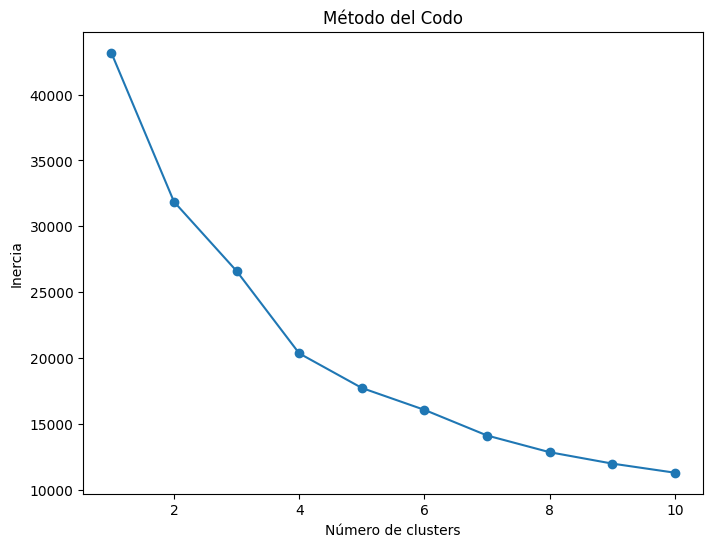

In [18]:
# Suponiendo que df_clean es el DataFrame limpio y estandarizado que creamos previamente
# Seleccionamos las columnas relevantes para el clustering
columns_to_cluster = ['PURCHASES', 'PURCHASES_FREQUENCY', 'BALANCE', 'CREDIT_LIMIT', 'PAYMENTS']
df_cluster = df_clean[columns_to_cluster]

# 1. Aplicación de K-means
# Determinar el número óptimo de clusters utilizando el método del codo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_cluster)
    inertia.append(kmeans.inertia_)
    
# Graficar el método del codo
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

Silhouette Score para K-means: 0.3365710163765819


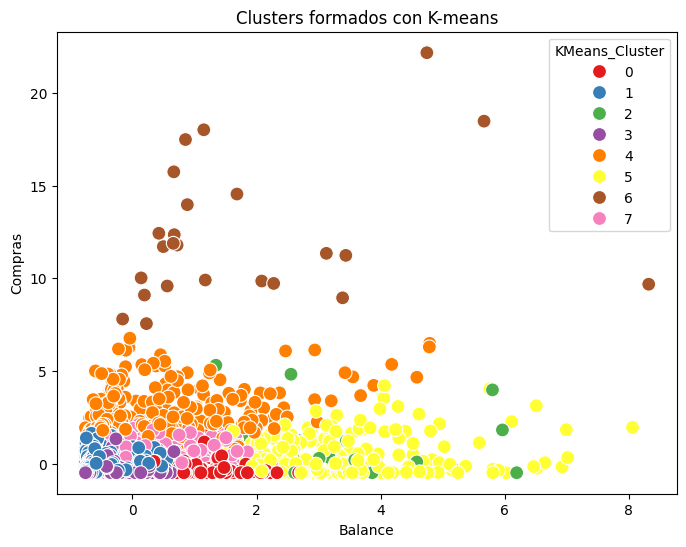

In [20]:
# Elige el número de clusters óptimo basado en el gráfico del codo (por ejemplo, k=4)
optimal_k = 8
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_clean['KMeans_Cluster'] = kmeans.fit_predict(df_cluster)

# Calcular el Silhouette Score para evaluar la calidad del clustering
silhouette_avg = silhouette_score(df_cluster, df_clean['KMeans_Cluster'])
print(f'Silhouette Score para K-means: {silhouette_avg}')

# Visualización de los clusters con K-means
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_clean['BALANCE'], y=df_clean['PURCHASES'], hue=df_clean['KMeans_Cluster'], palette='Set1', s=100)
plt.title('Clusters formados con K-means')
plt.xlabel('Balance')
plt.ylabel('Compras')
plt.show()

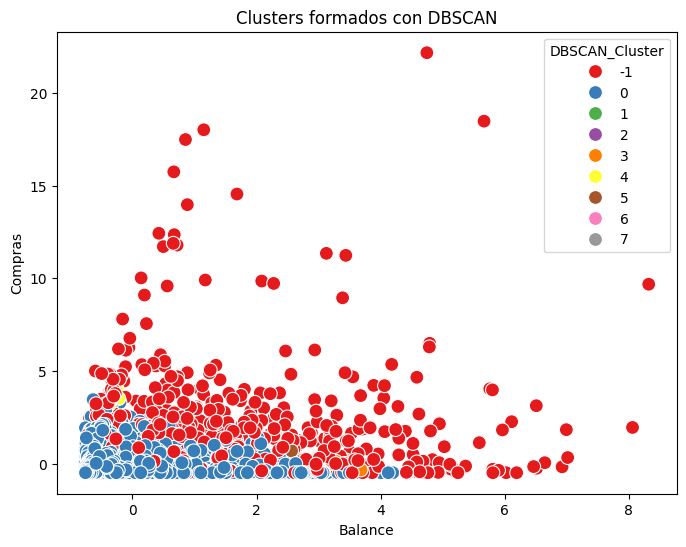

In [21]:
# 2. Aplicación de DBSCAN
# Normalizar los datos para DBSCAN
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)

# Probar diferentes valores de eps y min_samples
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_clean['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)

# Visualización de los clusters con DBSCAN
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_clean['BALANCE'], y=df_clean['PURCHASES'], hue=df_clean['DBSCAN_Cluster'], palette='Set1', s=100)
plt.title('Clusters formados con DBSCAN')
plt.xlabel('Balance')
plt.ylabel('Compras')
plt.show()

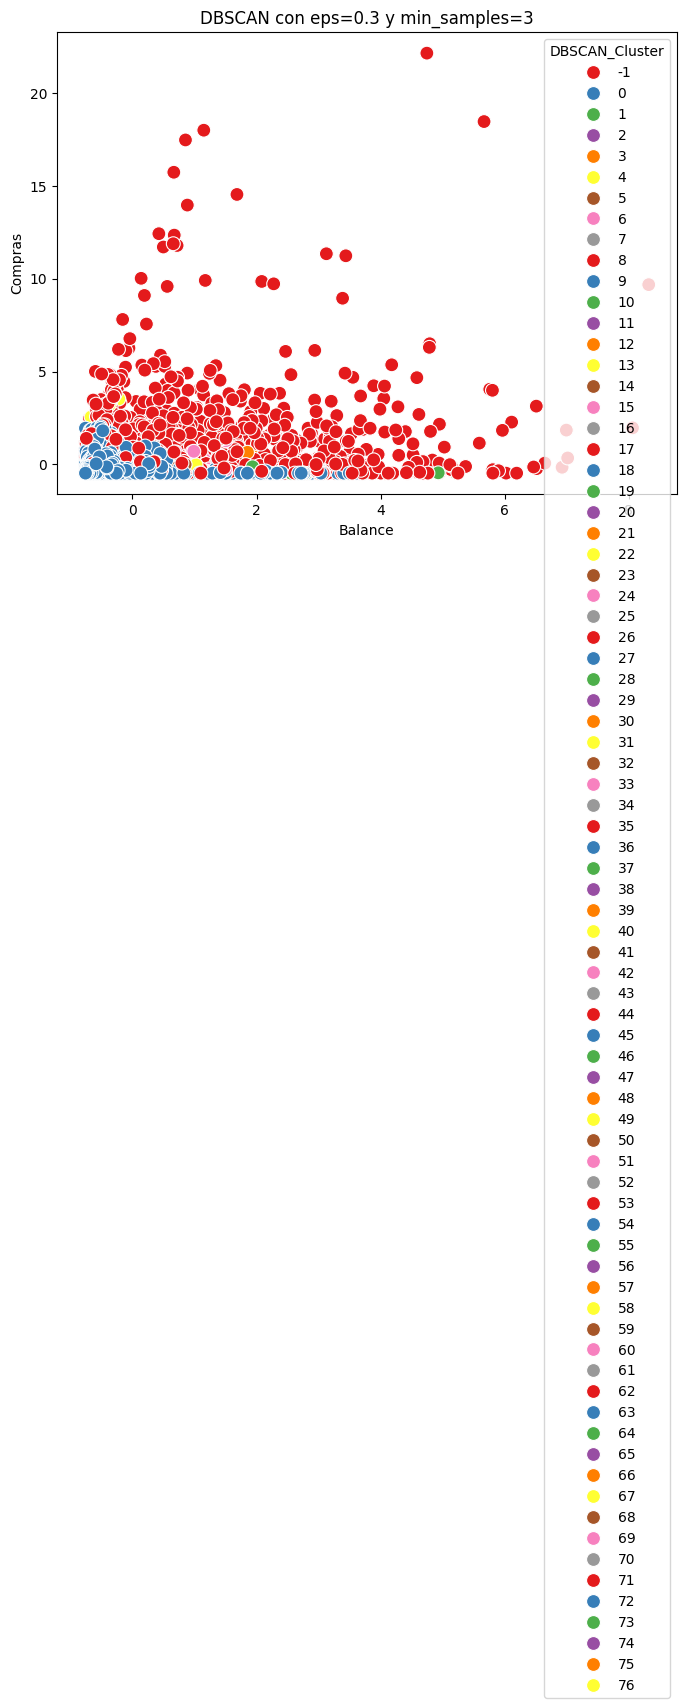

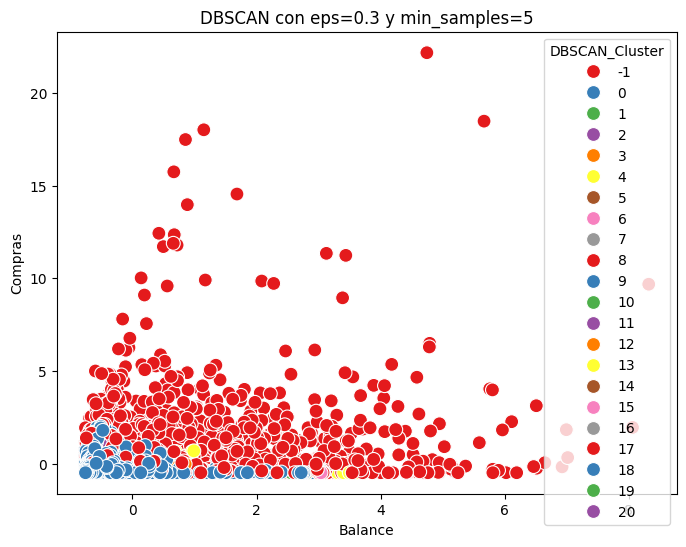

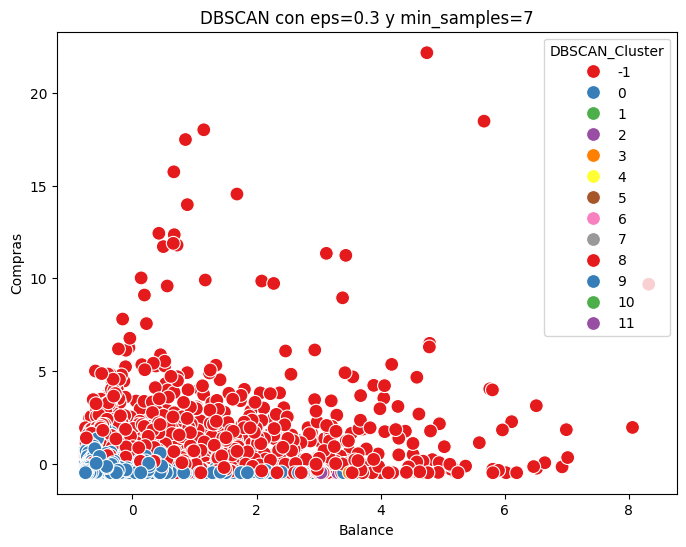

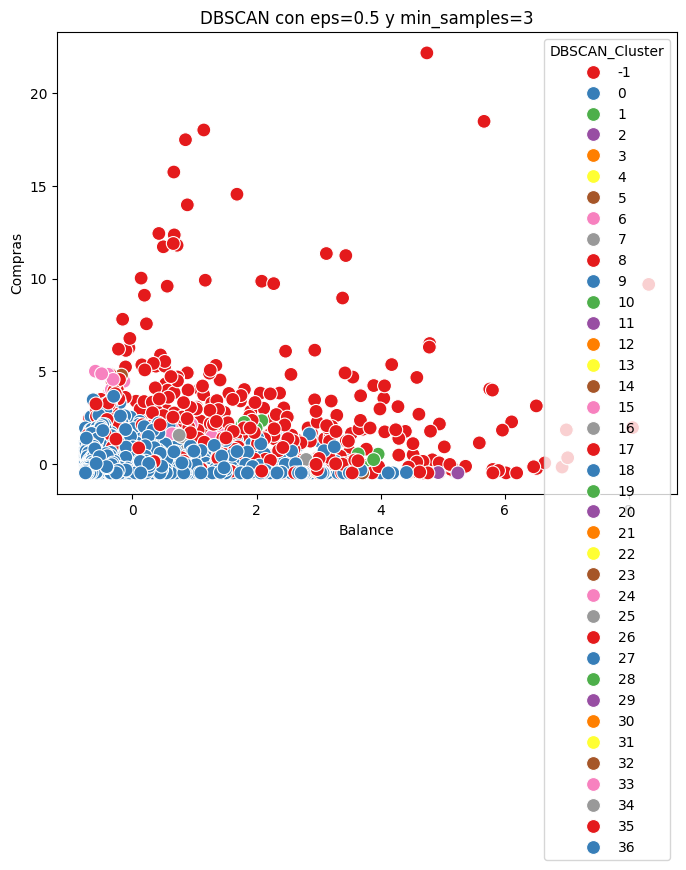

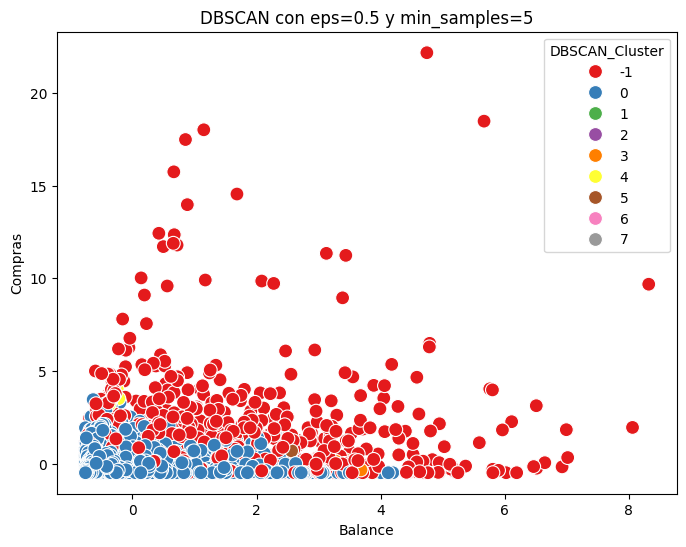

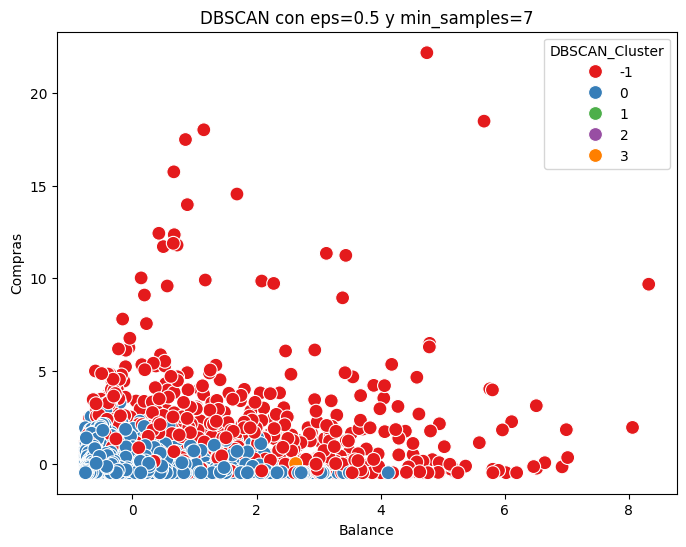

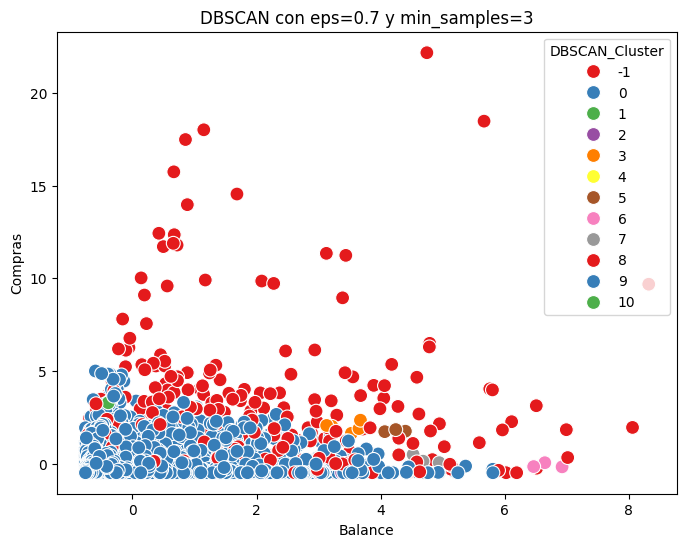

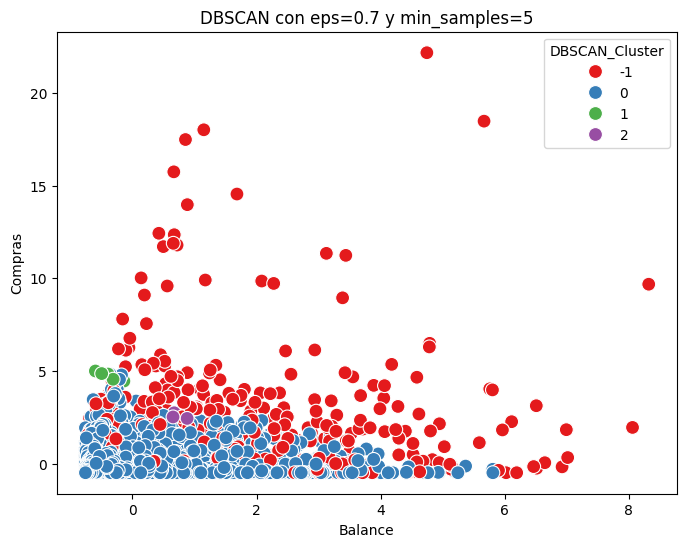

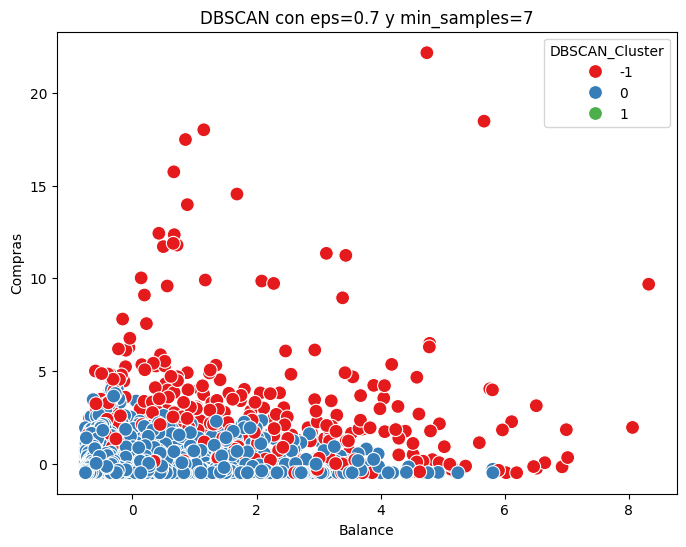

In [22]:
# Cambiar el valor de eps y min_samples para experimentar con DBSCAN
eps_values = [0.3, 0.5, 0.7]
min_samples_values = [3, 5, 7]

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        df_clean['DBSCAN_Cluster'] = dbscan.fit_predict(df_scaled)
        
        # Visualizar los resultados para cada combinación
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df_clean['BALANCE'], y=df_clean['PURCHASES'], hue=df_clean['DBSCAN_Cluster'], palette='Set1', s=100)
        plt.title(f'DBSCAN con eps={eps} y min_samples={min_samples}')
        plt.xlabel('Balance')
        plt.ylabel('Compras')
        plt.show()

4. Comparación mediante métricas:
 * Calcula y compara las siguientes métricas de evaluación para ambos algoritmos:
 * Silhouette Score: Esta métrica mide cuán similares son los puntos dentro del mismo cluster en comparación con los puntos de otros clusters.
 * Calinski-Harabasz Index: Esta métrica evalúa la dispersión entre los clusters y dentro de ellos, con mayores valores indicando una mejor definición de clusters.
 * Visualiza ambos agrupamientos utilizando gráficos de dispersión para comparar visualmente cómo K-means y DBSCAN dividen los datos.

In [24]:
# 1. Métricas para K-means
silhouette_kmeans = silhouette_score(df_cluster, df_clean['KMeans_Cluster'])
calinski_harabasz_kmeans = calinski_harabasz_score(df_cluster, df_clean['KMeans_Cluster'])

# 2. Métricas para DBSCAN
silhouette_dbscan = silhouette_score(df_scaled, df_clean['DBSCAN_Cluster'])
calinski_harabasz_dbscan = calinski_harabasz_score(df_scaled, df_clean['DBSCAN_Cluster'])

# Mostrar los resultados
print("K-means Evaluation Metrics:")
print(f"Silhouette Score: {silhouette_kmeans}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_kmeans}")

print("\nDBSCAN Evaluation Metrics:")
print(f"Silhouette Score: {silhouette_dbscan}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_dbscan}")

K-means Evaluation Metrics:
Silhouette Score: 0.3365710163765819
Calinski-Harabasz Index: 2908.252316197373

DBSCAN Evaluation Metrics:
Silhouette Score: 0.3422098840063336
Calinski-Harabasz Index: 1060.597520582142


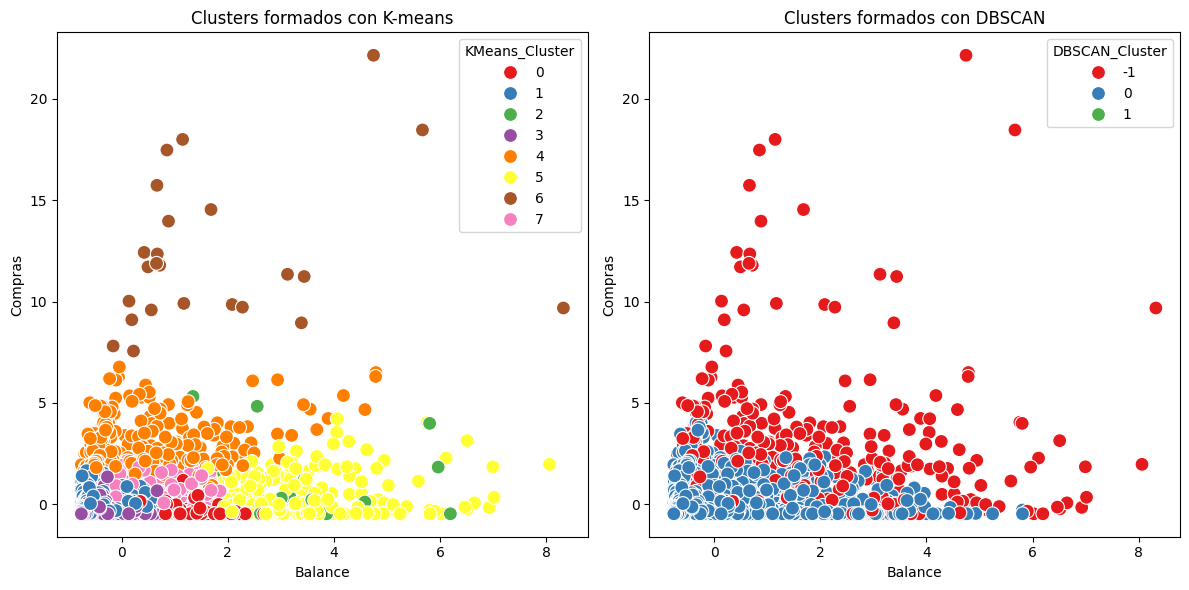

In [25]:
# 3. Visualización de los clustering de K-means y DBSCAN
plt.figure(figsize=(12, 6))

# Subgráfico para K-means
plt.subplot(1, 2, 1)
sns.scatterplot(x=df_clean['BALANCE'], y=df_clean['PURCHASES'], hue=df_clean['KMeans_Cluster'], palette='Set1', s=100)
plt.title('Clusters formados con K-means')
plt.xlabel('Balance')
plt.ylabel('Compras')

# Subgráfico para DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(x=df_clean['BALANCE'], y=df_clean['PURCHASES'], hue=df_clean['DBSCAN_Cluster'], palette='Set1', s=100)
plt.title('Clusters formados con DBSCAN')
plt.xlabel('Balance')
plt.ylabel('Compras')

plt.tight_layout()
plt.show()

5. Interpretación de resultados:
  * Discute cuál de los dos algoritmos ofrece un mejor rendimiento en este dataset basado en las métricas calculadas. ¿Los clusters formados por K-means son más cohesivos que los obtenidos con DBSCAN?
  * Analiza también los outliers detectados por DBSCAN. ¿Estos puntos tienen comportamientos inusuales en comparación con los clientes agrupados por K-means?

### Interpretación de Resultados:
K-means muestra una mejor dispersión de los clusters según el Calinski-Harabasz Index, lo que significa que los clusters generados son más separados entre sí, lo que facilita la identificación de grupos de clientes con comportamientos similares.

A pesar de que el Silhouette Score de DBSCAN es ligeramente superior, K-means sigue siendo superior en términos de la definición de clusters. Esto sugiere que K-means ha logrado una segmentación más robusta de los datos, aunque ambos algoritmos han mostrado una cohesión razonablemente alta.

### Análisis de los Outliers de DBSCAN:
DBSCAN ha sido capaz de identificar algunos outliers (clientes con comportamientos atípicos), lo cual es su principal ventaja frente a K-means. Los outliers detectados por DBSCAN representan clientes cuyos comportamientos no se ajustan bien a los patrones de compra de los demás, lo que podría ser útil si el objetivo es identificar clientes con características inusuales o con comportamientos atípicos que podrían requerir atención especial.

K-means, al no ser capaz de identificar explícitamente los outliers, incluye a todos los puntos dentro de los clusters, lo que podría hacer que algunos puntos atípicos sean agrupados de manera inadecuada. Esto es un inconveniente de K-means cuando se trata de identificar y tratar con clientes con comportamientos fuera de lo común.

### Conclusión Final:
K-means es el mejor algoritmo si el objetivo es obtener clusters bien definidos y homogéneos, con una buena separación entre los grupos. Esto es evidente por el Calinski-Harabasz Index más alto.

DBSCAN, a pesar de ser ligeramente superior en el Silhouette Score, tiene una peor definición de clusters en comparación con K-means debido a su menor Calinski-Harabasz Index. Sin embargo, DBSCAN tiene la ventaja de poder identificar outliers (puntos atípicos), lo cual puede ser útil para identificar clientes con comportamientos inusuales que no encajan en los patrones comunes.